In [69]:
#Employee salary prediction using adult csv
#load your library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [7]:
data=pd.read_csv(r"C:\Users\akrit\OneDrive\Desktop\EDUNET\adult 3.csv")

In [9]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
data.shape


(48842, 15)

In [13]:
data.head


<bound method NDFrame.head of        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Marrie

In [15]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [17]:
#Null values
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
data.isna().sum() #count of null values column wise

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [35]:
#no. of each category in a column 
print(data.occupation.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [39]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [29]:
#replace ? with default category : 'others'
data.occupation.replace({'?':'Others'},inplace=True)

In [31]:
data.workclass.replace({'?':'Others'},inplace=True)

In [37]:
#removing this from workclass column
data=data[data['workclass']!= 'Without-pay']
data=data[data['workclass']!= 'Never-worked']

In [41]:
data=data[data['education']!='5th-6th']
data=data[data['education']!='1st-4th']
data=data[data['education']!='Preschool']

In [43]:
print(data.education.value_counts())

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64


In [45]:
data.shape

(47972, 15)

In [49]:
#reduce dimension by removing education since we already have educational-num
data.drop(columns=['education'],inplace=True)

In [51]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<function matplotlib.pyplot.show(close=None, block=None)>

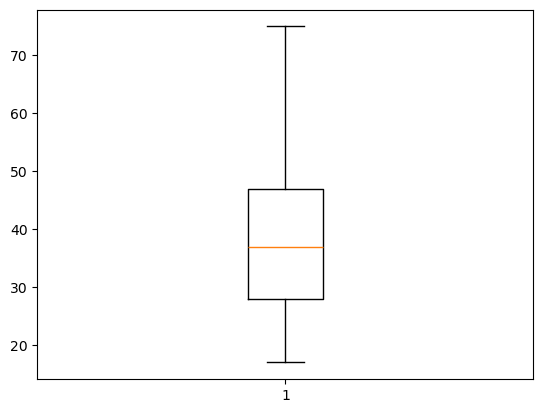

In [67]:
#outlier represented by circles
plt.boxplot(data['age'])
plt.show

In [65]:
data=data[(data['age']<=75) & (data['age']>=17)]

In [71]:
#Label encoding
encoder=LabelEncoder()
#fit the data for encoder to convert categorical values to numerical values
data['workclass']=encoder.fit_transform(data['workclass'])

C:\Users\akrit\AppData\Local\Temp\ipykernel_25020\1091970687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass']=encoder.fit_transform(data['workclass'])


In [77]:
#split data input,output
x=data.drop(columns=['income'])
y=data['income']

In [79]:
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,3,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,1,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,3,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,2,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,3,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,3,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,3,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [81]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 47619, dtype: object

In [83]:
!git clone https://github.com/akriti404/machine-learning.git

Cloning into 'machine-learning'...


In [85]:
%cd machine-learning

C:\Users\akrit\machine-learning


In [95]:
!git add Employee.ipynb

fatal: pathspec 'Employee.ipynb' did not match any files


In [101]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 7E87-1394

 Directory of C:\Users\akrit\machine-learning

03-07-2025  17:30    <DIR>          .
03-07-2025  17:31    <DIR>          ..
03-07-2025  17:30         5,326,370 adult 3.csv
03-07-2025  17:30                66 README.md
               2 File(s)      5,326,436 bytes
               2 Dir(s)  321,093,771,264 bytes free


In [103]:
import os
os.getcwd()


'C:\\Users\\akrit\\machine-learning'

In [105]:
%cd C:\\Users\\akrit\\machine-learning

C:\Users\akrit\machine-learning


In [107]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 7E87-1394

 Directory of C:\Users\akrit\machine-learning

03-07-2025  17:30    <DIR>          .
03-07-2025  17:35    <DIR>          ..
03-07-2025  17:30         5,326,370 adult 3.csv
03-07-2025  17:30                66 README.md
               2 File(s)      5,326,436 bytes
               2 Dir(s)  321,087,291,392 bytes free


In [111]:
!pip install ipynbname


In [113]:
import ipynbname
ipynbname.path()


WindowsPath('C:/Users/akrit/Employee.ipynb')

In [115]:
%cd C:/Users/akrit


C:\Users\akrit


In [117]:
!git init


Initialized empty Git repository in C:/Users/akrit/.git/


In [119]:
!git add Employee.ipynb


fatal: detected dubious ownership in repository at 'C:/Users/akrit'
'C:/Users/akrit' is owned by:
	NT AUTHORITY/SYSTEM (S-1-5-18)
but the current user is:
	DESKTOP-1TPC3JM/akrit (S-1-5-21-592913726-2937418921-1112253662-1001)
To add an exception for this directory, call:

	git config --global --add safe.directory C:/Users/akrit
